## Length of the report {-}
The length of the report must be no more than 15 pages, when printed as PDF. However, there is no requirement on the minimum number of pages.

You may put additional stuff as Appendix. You may refer to the Appendix in the main report to support your arguments. However, your appendix is unlikely to be checked while grading, unless the grader deems it necessary. The appendix and references will not be included in the page count, and there is no limit on the length of the appendix.

**Delete this section from the report, when using this template.** 

## Code should be put separately in the code template {-}
Your report should be in a research-paper like style. If there is something that can only be explained by showing the code, then you may put it, otherwise do not put the code in the report. We will check your code in the code template. 

However, feel free to write code that prints output and then hide the code using the *yaml* setting as shown in an example below *(in the EDA section)*

**Delete this section from the report, when using this template.** 

## Background / Motivation

What motivated you to work on this problem?

Mention any background about the problem, if it is required to understand your analysis later on.

## Problem statement 

Describe your problem statement. Articulate your objectives using absolutely no jargon. 

Since the quality of a wine is often determined by human tasters, and human taste is very subjective, the quality grade assigned to a specific wine might differ greatly between tasters. This makes it difficult for sommeliers and wine enthusiasts to know which wines to serve and/or purchase. Therefore, the goal of this project is to help address this problem by developing a machine learning model that can predict the quality of white wines based on their objective physicochemical properties, rather than subjective human taste.

## Data sources
What data did you use? Provide details about your data. Include links to data if you are using open-access data.

The dataset is obtained from the UCI Machine Learning Repository, and it contains information about various physicochemical properties of white wines and their corresponding quality ratings. We will be predicting the quality of the wine based on the other predictors. We will predict the quality of wine of a test set by training a model, so that we can use the predictor variables to predict the quality of wine. The dataset can be found at this link: https://archive.ics.uci.edu/ml/datasets/Wine+Quality (the exact datafile is found at "Data Folder" > "winequality-white.csv".

The dataset will help solve our problem by providing us data from which we can train a model to predict the quality of wine based on its objective properties, rather than relying on the subjectivity of human taste.

## Stakeholders
Who cares? If you are successful, what difference will it make to them?

Sensory analysis is an important part of the wine certification process, and as it is performed by human tasters, it is largely subjective, so it could be a powerful tool for winemakers to be able to predict the quality of their wine based on physicochemical properties, without relying on an outside taster and with a concrete basis for evaluation. They could adjust offerings accordingly to increase profit. Sommeliers in training would also benefit from this model to test the quality of their assessments and advance in their careers. Wine enthusiasts and casual wine drinkers could make more informed decisions about which wine to purchase since they would gain a better sense of what makes a good wine. 

## Data quality check / cleaning / preparation 

Show the distribution of the response here. Report the standard deviation and mean in case of a regression problem, and proportion of 0s and 1s in case of classification.

For all other content, as mentioned below, just provide the highlights *(if any)* and put the details in the appendix.

In a tabular form, show the distribution of values of each variable used in the analysis - for both categorical and continuous variables. Distribution of a categorical variable must include the number of missing values, the number of unique values, the frequency of all its levels. If a categorical variable has too many levels, you may just include the counts of the top 3-5 levels. 

Mention any useful insights you obtained from the data quality check that helped you develop the model or helped you realize the necessary data cleaning / preparation. Its ok if there were none.

Were there any potentially incorrect values of variables that required cleaning? If yes, how did you clean them? Were there missing values? How did you handle them? Its ok if the data was already clean.

Did you do any data wrangling or data preparation before the data was ready to use for model development? Did you create any new predictors from exisiting predictors? For example, if you have number of transactions and spend in a credit card dataset, you may create spend per transaction for predicting if a customer pays their credit card bill. Mention the steps at a broad level, you may put minor details in the appendix. Only mention the steps that ended up being useful towards developing your model(s).

## Exploratory data analysis

If there is any EDA that helped with model development, put it here. If EDA didn't help then mention that, and you may show your EDA effort *(if any)* in the appendix.

List the insights (as bullet points), if any, you got from EDA  that ended up being useful towards developing your final model. 

If there are too many plots / tables, you may put them into appendix, and just mention the insights you got from them.

Note that you can write code to publish the results of the code, but hide the code using the yaml setting `#|echo: false`. For example, the code below makes a plot, but the code itself is not published with Quarto in the report.

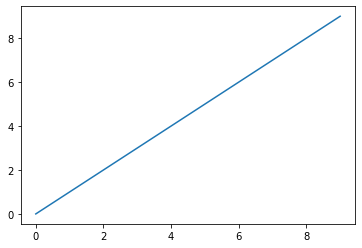

In [4]:
#| echo: false
import matplotlib.pyplot as plt
plt.plot(range(10));

## Approach

What kind of a models did you use? What performance metric(s) did you optimize and why?

Is there anything unorthodox / new in your approach? 

What problems did you anticipate? What problems did you encounter? 

Did your problem already have solution(s) (posted on Kaggle or elsewhere). If yes, then how did you build upon those solutions, what did you do differently? Is your model better as compared to those solutions in terms of prediction accuracy or your chosen metric?

**Important: Mention any code repositories (with citations) or other sources that you used, and specifically what changes you made to them for your project.**

## Developing the model: Hyperparameter tuning

Every person must describe their hyperparameter tuning procedure. Show the grid of hyperparameter values over which the initial search was done *(you may paste your grid search / random search / any other search code)*, and the optimal hyperparameter values obtained. After getting the initial search results, how did you make decisions *(if any)* to further fine-tune your model. Did you do another grid / random search or did you tune hyperparameters sequentially? If you think you didn't need any fine tuning after the initial results, then mention that and explain why.

Put each model in a section of its name and mention the name of the team-member tuning the model. Below is an example:

### Decision Tree
*By Aarti Pappu*

### Bagged Decision Trees
*By Divya Bhardwaj*

The grid of hyperparameter values over which the initial search was done included varyign values for max_samples, max_features, bootstrap, and bootstrap_features. As it was a bagging model, the number of trees was increased to a high enough amount once finding the optimal values for the other hyperparameters. 

In [ ]:
params = {'base_estimator': [DecisionTreeClassifier(random_state = 1)],
          'n_estimators': [300],
          'max_samples': [0.5, 0.75, 1.0],
          'max_features': [0.5, 0.75, 1.0],
          'bootstrap': [True, False],
          'bootstrap_features': [True, False]}

After obtaining the initial results, other three gridsearches were done to fine-tune the values of max_samples and max_features, based on plots of the K-fold f1 score and max_samples and max_features values, respectively, as well as the classification report and f1 score of the model with the found optimal hyperparameter values. Also, once the range of max_samples and max_features was narrowed down by proportions, I switched to utilizing the actual values in the gridsearch for more accurate fine-tuning. This was the final grid search, to refine the number of samples once the other hyperparameters' optimal values had been found through previous gridsearches:

In [ ]:
params = {'base_estimator': [DecisionTreeClassifier(random_state = 1)],
          'n_estimators': [300],
          'max_samples': [2400, 2500, 2600],
          'max_features': [7],
          'bootstrap': [True, False],
          'bootstrap_features': [True, False]}

Then, the number of trees was increased manually to an optimally high value in terms of the f1 score (which is usually better in the case of uneven class distribution due to how it balances precision and recall on the positive class) to find the overall optimal bagging model. The best parameters ended up being: bootstrap = False, bootstrap_features = False, max_features = 7, max_samples = 2500, and n_estimators = 650. 

### Random Forest
*By Diego Schummer*

##### Tuning

In the parameter grid, I've added 'class_weight' to handle the class imbalance. It adjusts the cost function to give more weight to under-represented classes and less weight to over-represented ones. 'balanced' and 'balanced_subsample' automatically adjust weights inversely proportional to class frequencies. The 'None' option is added to compare the performance with and without class weighting.

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'class_weight' : ['balanced', 'balanced_subsample', None]
}

After running the initial search and creating the model with the best params, looking at the feature importance and classification result led to a few observations: 
    - Class 6: Similar to class 5, the precision and recall are around 0.60. This class seems to be the best predicted by the model.
    - The accuracy of the model is 0.56 or 56%, which is the proportion of true results (both true positives and true negatives) in the population.
    - the model is performing decently for classes 5, 6, and 7 but poorly for the other classes.

I then compared it to the base model and saw similar performace , so I ran a broader search to see if some parameters I had not accoutned for might improve the stagnant performance seen. 


In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 5, 10],
    'class_weight': [None, 'balanced']
}

The best model selected from here proved to reamin having similar performance to the base model, showing that tuning did not improve the metrics discussed by a noticeable margin.

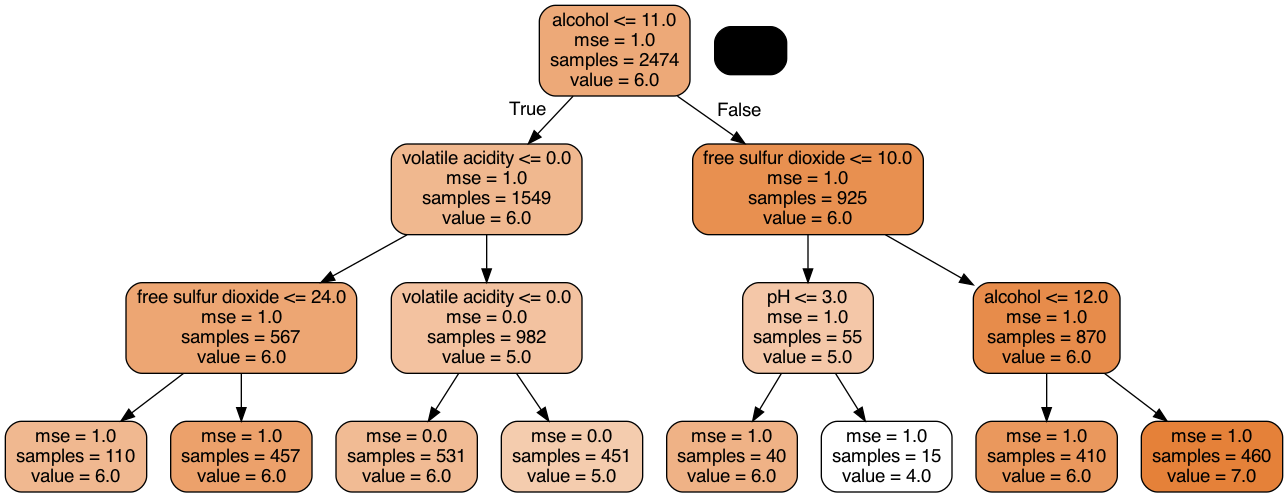

### XGBoost
*By Yasmeen Nahas*

## Model Ensemble 

Put the results of enembling individual models. Feel free to add subsections in this section to add more innovative ensembling methods.

### Voting ensemble

The simplest voting ensemble will be the model where all models have equal weights.

You may come up with innovative methods of estimating weights of the individual models, such as based on their cross-val error. Sometimes, these methods may work better than stacking ensembles, as stacking ensembles tend to overfit.

### Stacking ensemble
Try out different models as the metamodel. You may split work as follows. The person who worked on certain types of models *(say AdaBoost and MARS)* also uses those models as a metamodel in the stacking ensemble.

### Ensemble of ensembled models

If you are creating multiple stacking ensembles *(based on different metamodels)*, you may ensemble them.

### Innovative ensembling methods
*(Optional)*

Some models may do better on certain subsets of the predictor space. You may find that out, and given a data point, choose the model(s) that will best predict for that data point. This is similar to the idea of developing a decision tree metamodel. However, decision tree is prone to overfitting.

Another idea may be to correct the individual models with the intercept and slope *(note the tree-based models don't have an intercept and may suffer from a constant bias)*, and then ensemble them. This is equivalent to having a simple linear regression meta-model for each of the individual models, and then ensembling the meta-models with a meta-metamodel or a voting ensemble.

## Limitations of the model with regard to prediction

Are you confident that you found the optimal hyperparameter values for each of your individual models, and that your individual models cannot be better tuned? Or, are there any models that could be better tuned if you had more time / resources, but you are limited by the amount of time you can spend on the course project *(equivalent to one assignment)*? If yes, then which models could be better tuned and how?

Will it be possible / convenient / expensive for the stakeholders to collect the data relating to the predictors in the model. Using your model, how soon will the stakeholder be able to predict the outcome before the outcome occurs. For example, if the model predicts the number of bikes people will rent in Evanston on a certain day, then how many days before that day will your model be able to make the prediction. This will depend on how soon the data that your model uses becomes available. If you are predicting election results, how many days / weeks / months / years before the election can you predict the results. 

When will your model become too obsolete to be useful?

## Other sections *(optional)*

You are welcome to introduce additional sections or subsections, if required, to address any specific aspects of your project in detail. For example, you may briefly discuss potential future work that the research community could focus on to make further progress in the direction of your project's topic.

## Conclusions and Recommendations to stakeholder(s)

What conclusions do you draw based on your model? You may draw conclusions based on prediction accuracy, or other performance metrics.

How do you use those conclusions to come up with meaningful recommendations for stakeholders? The recommendations must be action-items for stakeholders that they can directly implement without any further analysis. Be as precise as possible. The stakeholder(s) are depending on you to come up with practically implementable recommendations, instead of having to think for themselves.

If your recommendations are not practically implementable by stakeholders, how will they help them? Is there some additional data / analysis / domain expertise you need to do to make the recommendations implementable? 

Do the stakeholder(s) need to be aware about some limitations of your model? Is your model only good for one-time use, or is it possible to update your model at a certain frequency (based on recent data) to keep using it in the future? If it can be used in the future, then for how far into the future?

Add details of each team member's contribution, other than the models contributed, in the table below.

<html>
<style>
table, td, th {
  border: 1px solid black;
}

table {
  border-collapse: collapse;
  width: 100%;
}

th {
  text-align: left;
}
    

</style>
<body>

<h2>Individual contribution</h2>

<table style="width:100%">
     <colgroup>
       <col span="1" style="width: 15%;">
       <col span="1" style="width: 20%;">
       <col span="1" style="width: 25%;">
       <col span="1" style="width: 40%;">
    </colgroup>
  <tr>
    <th>Team member</th>
    <th>Individual Model</th>
    <th>Work other than individual model</th>    
    <th>Details of work other than individual model</th>
  </tr>
  <tr>
    <td>Sylvia Sherwood</td>
    <td>Lasso, Ridge & Catboost</td>
    <td>Data cleaning and EDA</td>    
    <td>Imputed missing values and visualized data</td>
  </tr>
  <tr>
    <td>Sankaranarayanan Balasubramanian</td>
    <td>MARS, AdaBoost & LightGBM</td>
    <td>Ensembling</td>    
    <td>Stacking ensembles and voting ensemble</td>
  </tr>
    <tr>
    <td>Fiona Fe</td>
    <td>Bagged trees & Random forest</td>
    <td>Variable selection</td>    
    <td>Variable selection based on feature importance</td>
  </tr>
    <tr>
    <td>Ryu Kimiko</td>
    <td>XGBoost</td>
    <td>Ensembling</td>    
    <td>Innovative ensemble & stacking ensemble</td> 
  </tr>
</table>

## References {-}

List and number all bibliographical references. When referenced in the text, enclose the citation number in square brackets, for example [1].

[1] Authors. The frobnicatable foo filter, 2014. Face and Gesture submission ID 324. Supplied as additional material
fg324.pdf. 3


## Appendix {-}

You may put additional stuff here as Appendix. You may refer to the Appendix in the main report to support your arguments. However, the appendix section is unlikely to be checked while grading, unless the grader deems it necessary.